# Visualising the anatomical masks created by ROI-transforms

Written by K. Garner, 2020

In [1]:
import nilearn.plotting as niplt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nibabel as nib
import pandas as pd
import os, re, json, glob
import numpy as np

First, define variables and files that will be used across subjects 

In [2]:
subs = ['01', '02', '03', '04', '05']
Basedir = "/scratch/qbi/uqkgarn1/STRIWP1/"

Get subjects' T1ws

In [3]:
T1w_fStr = ''.join([Basedir, 'derivatives/sub-{0}/anat/sub-{0}_desc-preproc_T1w.nii.gz'])
T1w_fns = [T1w_fStr.format(subnum) for subnum in subs] 
T1w_fns

['/scratch/qbi/uqkgarn1/STRIWP1/derivatives/sub-01/anat/sub-01_desc-preproc_T1w.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/sub-02/anat/sub-02_desc-preproc_T1w.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/sub-03/anat/sub-03_desc-preproc_T1w.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/sub-04/anat/sub-04_desc-preproc_T1w.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/sub-05/anat/sub-05_desc-preproc_T1w.nii.gz']

Get ROI files for each atlas

In [4]:
Kfstr = ''.join([Basedir, 'derivatives/roi-masks/sub-01/Keuken/*.nii.gz'])
Keuken_ROI_masks = glob.glob(Kfstr)

In [5]:
RFLstr = ''.join([Basedir, 'derivatives/roi-masks/sub-01/RFL/*.nii.gz'])
RFL_ROI_masks = glob.glob(RFLstr)
RFL_ROI_masks = RFL_ROI_masks[0:4] + RFL_ROI_masks[6:8] #, 1, 2, 3, 6, 7]
masks = Keuken_ROI_masks + RFL_ROI_masks
masks

['/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-01/Keuken/VS_trans.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-01/Keuken/GPi_trans.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-01/Keuken/GPe_trans.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-01/Keuken/CN_trans.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-01/Keuken/Put_trans.nii.gz',
 '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-01/Keuken/STN_trans.nii.gz']

## Regions of interest to be plotted

1. Caudate Nucleus
2. Putamen
3. Ventral striatum (K)/Nucleus Accumbens (RFL)
4. Globus Pallidus internal
5. Globus Pallidus external
6. Subthalamic Nucleus

For each region, I will plot the 5 subjects on the left with the ROI defined by the Keuken atlas, and 5 subjects on the right with the RFL atlas. To start, I will define a function that plots each subs T1w with a mask file, and saves as an image. I'll then apply this over the list of subjects and the list of mask files.

In [6]:
def plot_T1_w_mask(T1, masks, savepath='/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/figures/'):
    savenames = None
    for m in masks:
        disp = niplt.plot_roi(roi_img=m, bg_img=T1)
        
        # now get the filename details
        this_sub = re.search('.*sub-([0-9]*)_.*', T1)
        this_sub = this_sub.group(1)
        this_mask = os.path.split(m)
        this_mask = this_mask[-1]
        this_mask = this_mask.replace('_trans.nii.gz', '')
        thissavename = ''.join([savepath, 'sub-', this_sub, '_mask-', this_mask, '.png'])
        disp.savefig(thissavename)
        disp.close()
        if savenames is None:
            savenames = [thissavename]
        else:
            savenames = savenames + [thissavename]
    return savenames

In [7]:
figs = [plot_T1_w_mask(T1, masks) for T1 in T1w_fns]

## Summary of next steps

I downloaded the saved images and visually compared between the 2 atlases. Both were very comparable, but I am erring towards using the Keuken et al atlas, as the delineation of the brain regions looks a little neater than the RFL atlas. Also, the 

# Plotting the joined binarised masks for 1 participant to check they are ok

In [8]:
def plotMask(mask, T1, sub, ROI, axes=None):
    roi_im = mask % (sub, ROI)
    T1 = T1 % (sub, sub)
    return niplt.plot_roi(roi_img=roi_im, 
                          bg_img=T1, 
                          axes=axes,
                          annotate=True,
                          draw_cross=False,
                          title= 'sub %s, ROI %s' % (sub, ROI)) 

In [9]:
T1 = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/anat/sub-%s_desc-masked_T1w.nii.gz'
mask = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-%s/Cort/%s_trans.nii.gz'

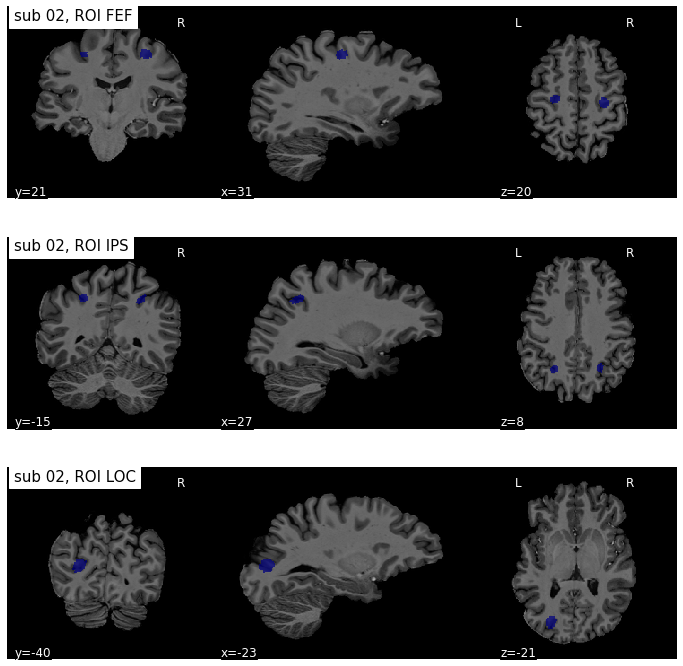

In [10]:
cortf, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[12,12])
plotMask(mask, T1, '02', 'FEF', axes=ax1)
plotMask(mask, T1, '02', 'IPS', axes=ax2)
plotMask(mask, T1, '02', 'LOC', axes=ax3)

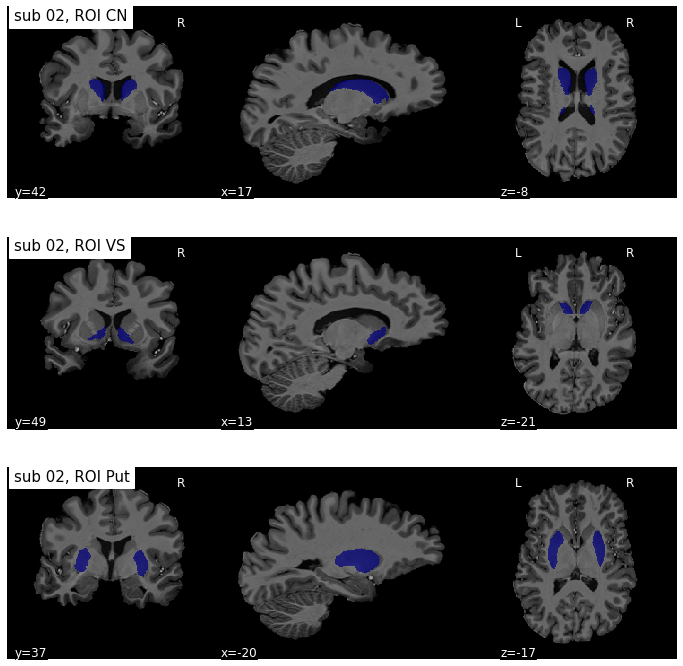

In [13]:
mask = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/roi-masks/sub-%s/Keuken/%s_trans.nii.gz'
subcortf, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[12,12])
plotMask(mask, T1, '02', 'CN', axes=ax1)
plotMask(mask, T1, '02', 'VS', axes=ax2)
plotMask(mask, T1, '02', 'Put', axes=ax3)


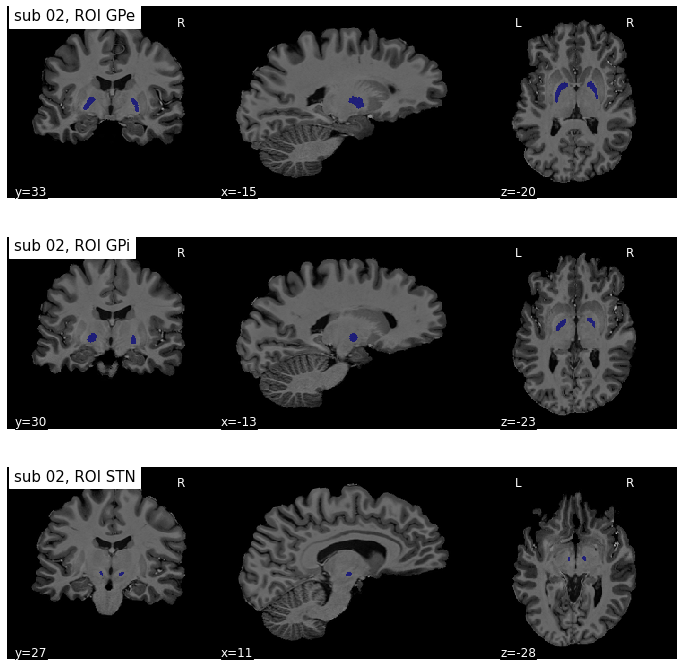

In [14]:
subcortff, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[12,12])
plotMask(mask, T1, '02', 'GPe', axes=ax1)
plotMask(mask, T1, '02', 'GPi', axes=ax2)
plotMask(mask, T1, '02', 'STN', axes=ax3)